# 第 1 周作业：Kaggle  House Prices 房价预测问题

预览数据，确保正确读入。

In [1]:
import pandas as pd

df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')

In [3]:
pd.options.display.max_columns = 100

df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1]:
# 把全部的列都显示出来

# 看一看所有的数据，看看自己有哪些想法 

# MSSubClass 是一个类别数据，要把转换成字符串类型
# YearBuilt、YearRemodAdd 这种其实是时间类型特征（并且通过上面的分析，我们知道，还是一个重要特征），可以转换成“经历了多少年”，例如 2003 可以转换成 2018 - 2003 = 15
# BsmtFinSF2 有很多 0
# LowQualFinSF 也有很多 0
# PoolArea 很多 0，干脆我对每一列统计一下 0 的个数

# BsmtFullBath、BsmtHalfBath 地下室齐全的浴室、地下室齐全的半浴室
# BedroomAbvGr 地下室水平以上卧室数
# MoSold	已售出月份
# YrSold	已售出年份 可能年份比月份要靠谱吧

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

看看数据有多少条，特征有多少。

In [2]:
df_train.shape

(1460, 81)

有 1460 条数据，81 个特征。

+ 特征的类型主要有 2 类：数值型和类别型。

我们使用下面的代码分别将它们过滤出来。

In [3]:
numeric_features = df_train.select_dtypes(include=[np.number]).columns
numeric_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [4]:
category_features = df_train.select_dtypes(include=[np.object]).columns
category_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [5]:
len(numeric_features), len(category_features)

(38, 43)

我们发现，有些数值型的数据其实是类别型的，第 1 个特征就是这样：MSSubClass。

看看缺失的数据，缺太多的，我们就丢弃。

In [6]:
df_train.isnull().sum().sort_values(ascending=False).head(30)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
YearRemodAdd       0
MSSubClass         0
Foundation         0
ExterCond          0
ExterQual          0
Exterior2nd        0
Exterior1st        0
RoofMatl           0
RoofStyle          0
YearBuilt          0
dtype: int64

PoolQC           1453 泳池质量  
MiscFeature      1406 其他类别未涉及的杂项功能  
Alley            1369 胡同通道的类型  
Fence            1179 栅栏质量  
FireplaceQu       690 Fireplace quality  
 
这几个特征我们就可以不要了，缺失太多。  

In [7]:
(df_train.isnull().sum().sort_values(ascending=False) / df_train.shape[0]).head(30)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
YearRemodAdd    0.000000
MSSubClass      0.000000
Foundation      0.000000
ExterCond       0.000000
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
RoofStyle       0.000000
YearBuilt       0.000000
dtype: float64

In [8]:
df_train.apply(lambda x: x == 0).sum().sort_values(ascending=False).head(20)

PoolArea         1453
3SsnPorch        1436
LowQualFinSF     1434
MiscVal          1408
BsmtHalfBath     1378
ScreenPorch      1344
BsmtFinSF2       1293
EnclosedPorch    1252
HalfBath          913
MasVnrArea        861
BsmtFullBath      856
2ndFlrSF          829
WoodDeckSF        761
Fireplaces        690
OpenPorchSF       656
BsmtFinSF1        467
BsmtUnfSF         118
GarageCars         81
GarageArea         81
TotalBsmtSF        37
dtype: int64

In [9]:
pd.set_option('precision', 4)
df_train.apply(lambda x: x == 0).sum().sort_values(
    ascending=False) / df_train.shape[0]

PoolArea         0.9952
3SsnPorch        0.9836
LowQualFinSF     0.9822
MiscVal          0.9644
BsmtHalfBath     0.9438
ScreenPorch      0.9205
BsmtFinSF2       0.8856
EnclosedPorch    0.8575
HalfBath         0.6253
MasVnrArea       0.5897
BsmtFullBath     0.5863
2ndFlrSF         0.5678
WoodDeckSF       0.5212
Fireplaces       0.4726
OpenPorchSF      0.4493
BsmtFinSF1       0.3199
BsmtUnfSF        0.0808
GarageCars       0.0555
GarageArea       0.0555
TotalBsmtSF      0.0253
FullBath         0.0062
BedroomAbvGr     0.0041
KitchenAbvGr     0.0007
RoofStyle        0.0000
YearRemodAdd     0.0000
YearBuilt        0.0000
OverallCond      0.0000
RoofMatl         0.0000
Exterior1st      0.0000
Exterior2nd      0.0000
                  ...  
HeatingQC        0.0000
Foundation       0.0000
FireplaceQu      0.0000
SaleType         0.0000
YrSold           0.0000
MoSold           0.0000
MiscFeature      0.0000
Fence            0.0000
PoolQC           0.0000
PavedDrive       0.0000
GarageCond      

In [10]:
over_80_per_null_columns = df_train.isnull().sum().sort_values(ascending=False)[:5].index
print(over_80_per_null_columns)
over_80_per_zero_columns = df_train.apply(lambda x: x == 0).sum().sort_values(ascending=False)[:8].index
print(over_80_per_zero_columns)

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], dtype='object')
Index(['PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath',
       'ScreenPorch', 'BsmtFinSF2', 'EnclosedPorch'],
      dtype='object')


In [11]:
drop_columns = over_80_per_null_columns.append(over_80_per_zero_columns)
drop_columns

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'PoolArea',
       '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'ScreenPorch',
       'BsmtFinSF2', 'EnclosedPorch'],
      dtype='object')

丢弃空值很多和 0 值很多的特征。

In [12]:
df_train = df_train.drop(columns=drop_columns)

In [13]:
df_train.shape

(1460, 68)

In [14]:
numeric_features = df_train.select_dtypes(include=[np.number]).columns
numeric_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [15]:
category_features = df_train.select_dtypes(include=[np.object]).columns
category_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [16]:
len(numeric_features), len(category_features)

(30, 38)

In [17]:
corr_mat = df_train.corr()

In [18]:
corr_mat['SalePrice'].sort_values(ascending=False)

SalePrice       1.0000
OverallQual     0.7910
GrLivArea       0.7086
GarageCars      0.6404
GarageArea      0.6234
TotalBsmtSF     0.6136
1stFlrSF        0.6059
FullBath        0.5607
TotRmsAbvGrd    0.5337
YearBuilt       0.5229
YearRemodAdd    0.5071
GarageYrBlt     0.4864
MasVnrArea      0.4775
Fireplaces      0.4669
BsmtFinSF1      0.3864
LotFrontage     0.3518
WoodDeckSF      0.3244
2ndFlrSF        0.3193
OpenPorchSF     0.3159
HalfBath        0.2841
LotArea         0.2638
BsmtFullBath    0.2271
BsmtUnfSF       0.2145
BedroomAbvGr    0.1682
MoSold          0.0464
Id             -0.0219
YrSold         -0.0289
OverallCond    -0.0779
MSSubClass     -0.0843
KitchenAbvGr   -0.1359
Name: SalePrice, dtype: float64

## 通过相关系数筛选重要的数值型特征

+ 这里的相关性值的是线性相关，通过计算该特征变量和目标变量的相关系数得到。
+ 在数值型特征中，为了避免多重共线性，去掉线性相关较强的一些特征，原则是保留与 SalePrice 相关性较大的特征。

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


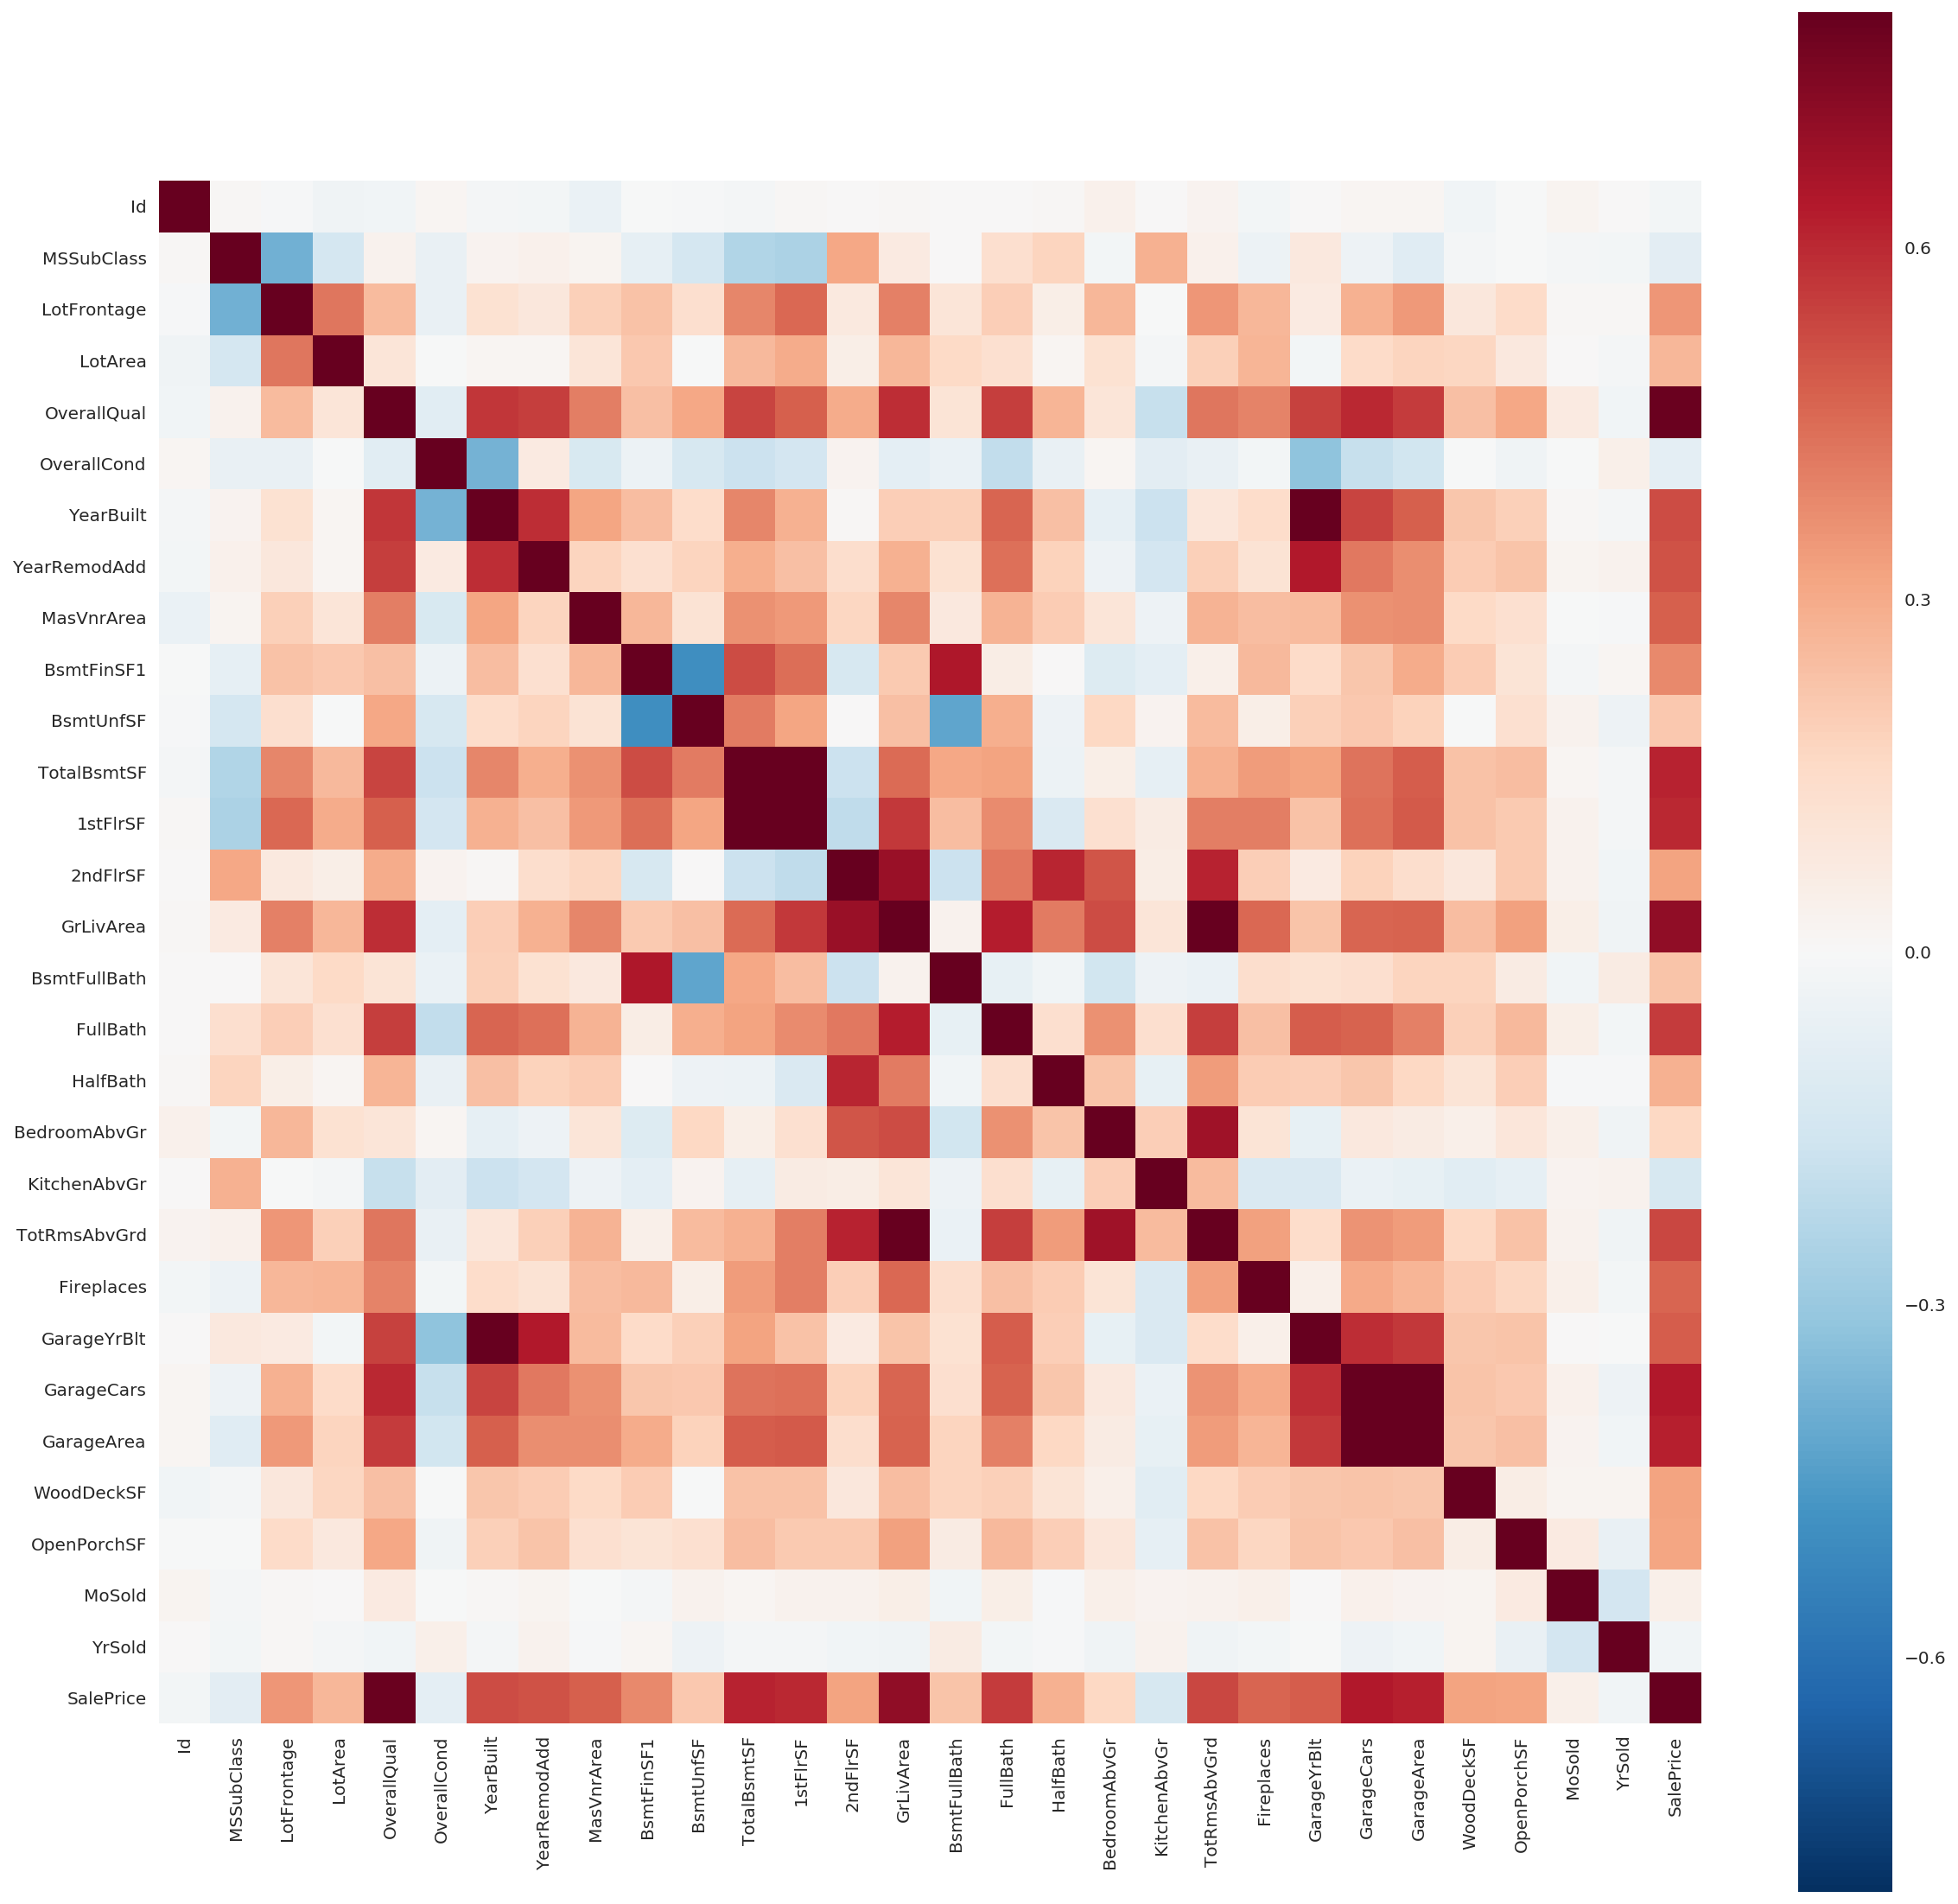

In [19]:
import seaborn as sns

# 从上面的相关系数矩阵中，可以看出，除了 SalePrice 自己对自己的相关系数是 1 以外，最大的是 0.790982，
# 因此，我们可以设置 vmax=0.8
# square=True 是为了让图片看起来不挤
plt.figure(figsize=(20, 20))
sns.heatmap(corr_mat, square=True, vmax=0.8)
plt.show()

SalePrice        1.000000  
OverallQual      0.790982 整体材料和成品质量
GrLivArea        0.708624 以上（地面）生活区平方英尺  
GarageCars       0.640409 车库容量的车库大小  
GarageArea       0.623431 车库的面积，平方英尺  
TotalBsmtSF      0.613581 地下室总面积  
1stFlrSF         0.605852 一楼平方英尺  
FullBath         0.560664 满级以上的浴室  
TotRmsAbvGrd     0.533723 超过等级的房间总数 (不包括卫生间)  
YearBuilt        0.522897 原始施工日期  
YearRemodAdd     0.507101 改造日期  
GarageYrBlt      0.486362 年车库建成  
MasVnrArea       0.477493 平方英尺的砌体饰面区域  
Fireplaces       0.466929 壁炉数

下面我们看看数据。

把排名前 14 的特征重新画一下相关系数矩阵。

In [20]:
df_train_importance = df_train[corr_mat['SalePrice'].sort_values(ascending=False)[
    :14].index]

In [21]:
micro_corr_mat = df_train_importance.corr()

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


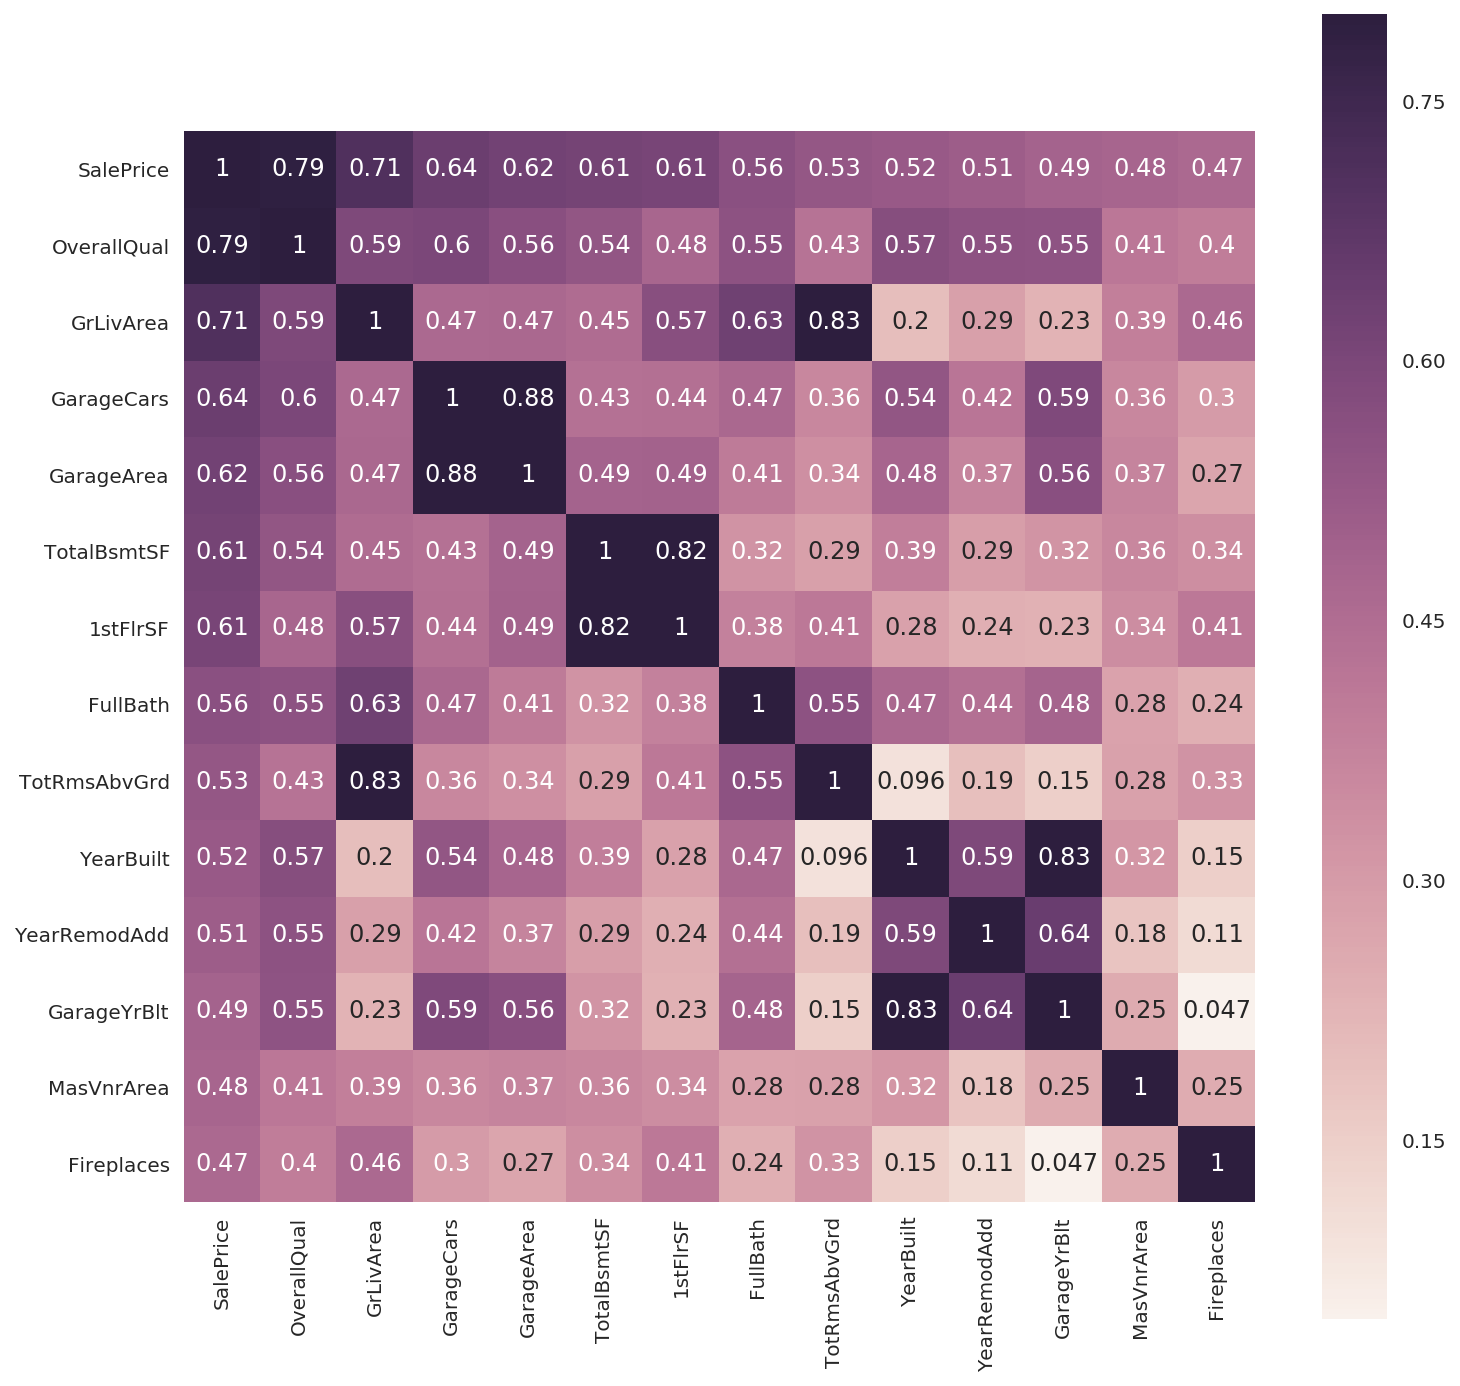

In [22]:
import seaborn as sns


plt.figure(figsize=(12, 12))
sns.heatmap(micro_corr_mat, square=True, vmax=0.8, annot=True, fmt='.2g')
plt.show()

为了去除多重共线性的影响，我们看颜色很深的块。

In [23]:
selected_numeric_features = list(df_train_importance.columns)
selected_numeric_features

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces']

In [24]:
selected_numeric_features.remove('SalePrice')
selected_numeric_features.remove('GarageArea')
selected_numeric_features.remove('1stFlrSF')
selected_numeric_features.remove('TotRmsAbvGrd')
selected_numeric_features.remove('GarageYrBlt')

In [25]:
selected_numeric_features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'Fireplaces']

## 下面我们选类别型特征

In [26]:
category_features = df_train.select_dtypes(include=[np.object]).columns
category_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [27]:
len(category_features)

38

类别型的筛选，我用的是不怎么科学的看箱线图的方法。看看不同的类别特征，对应的 SalePrice 是不是有区分度。

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


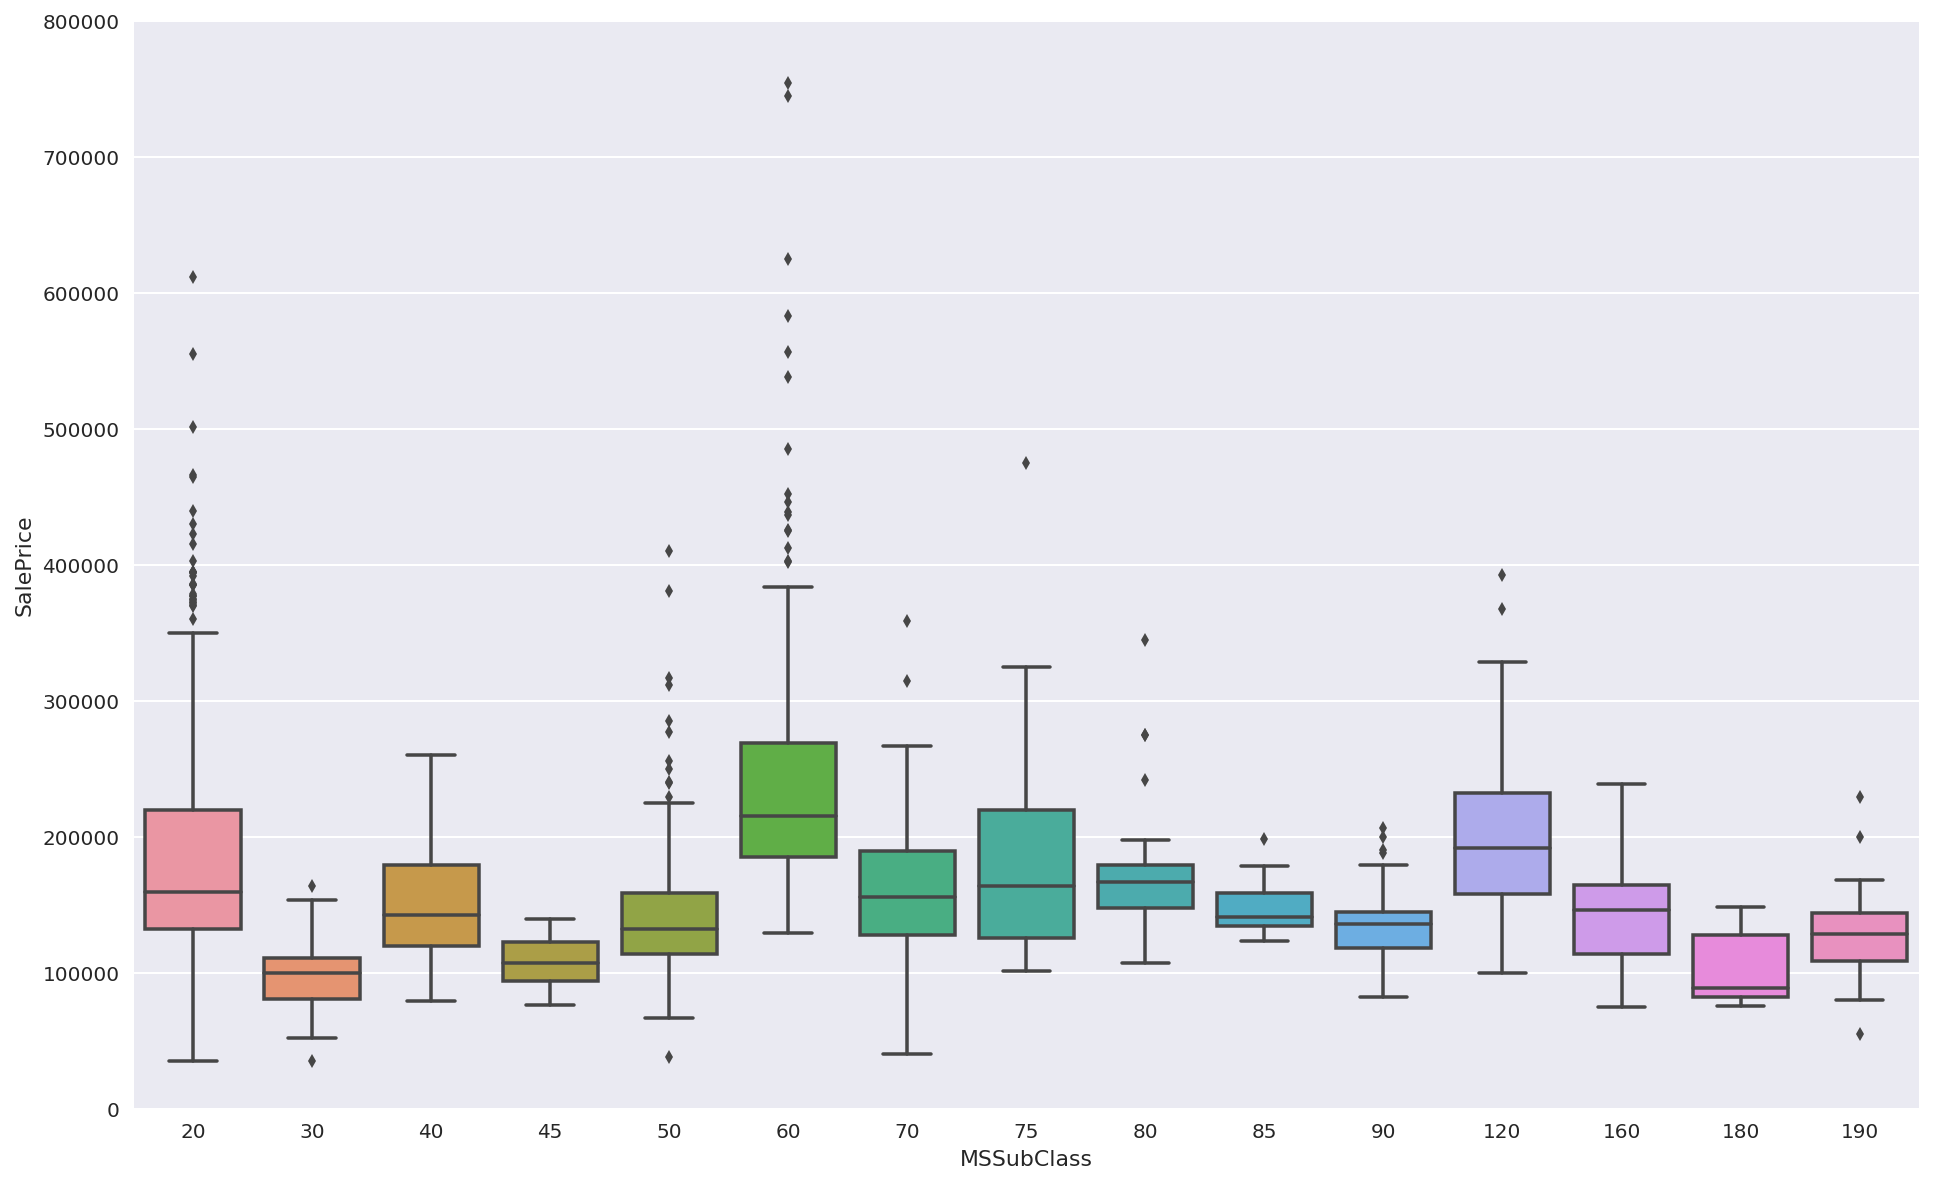

In [28]:
var = 'MSSubClass'
data = pd.concat([df_train[var],df_train['SalePrice']],axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


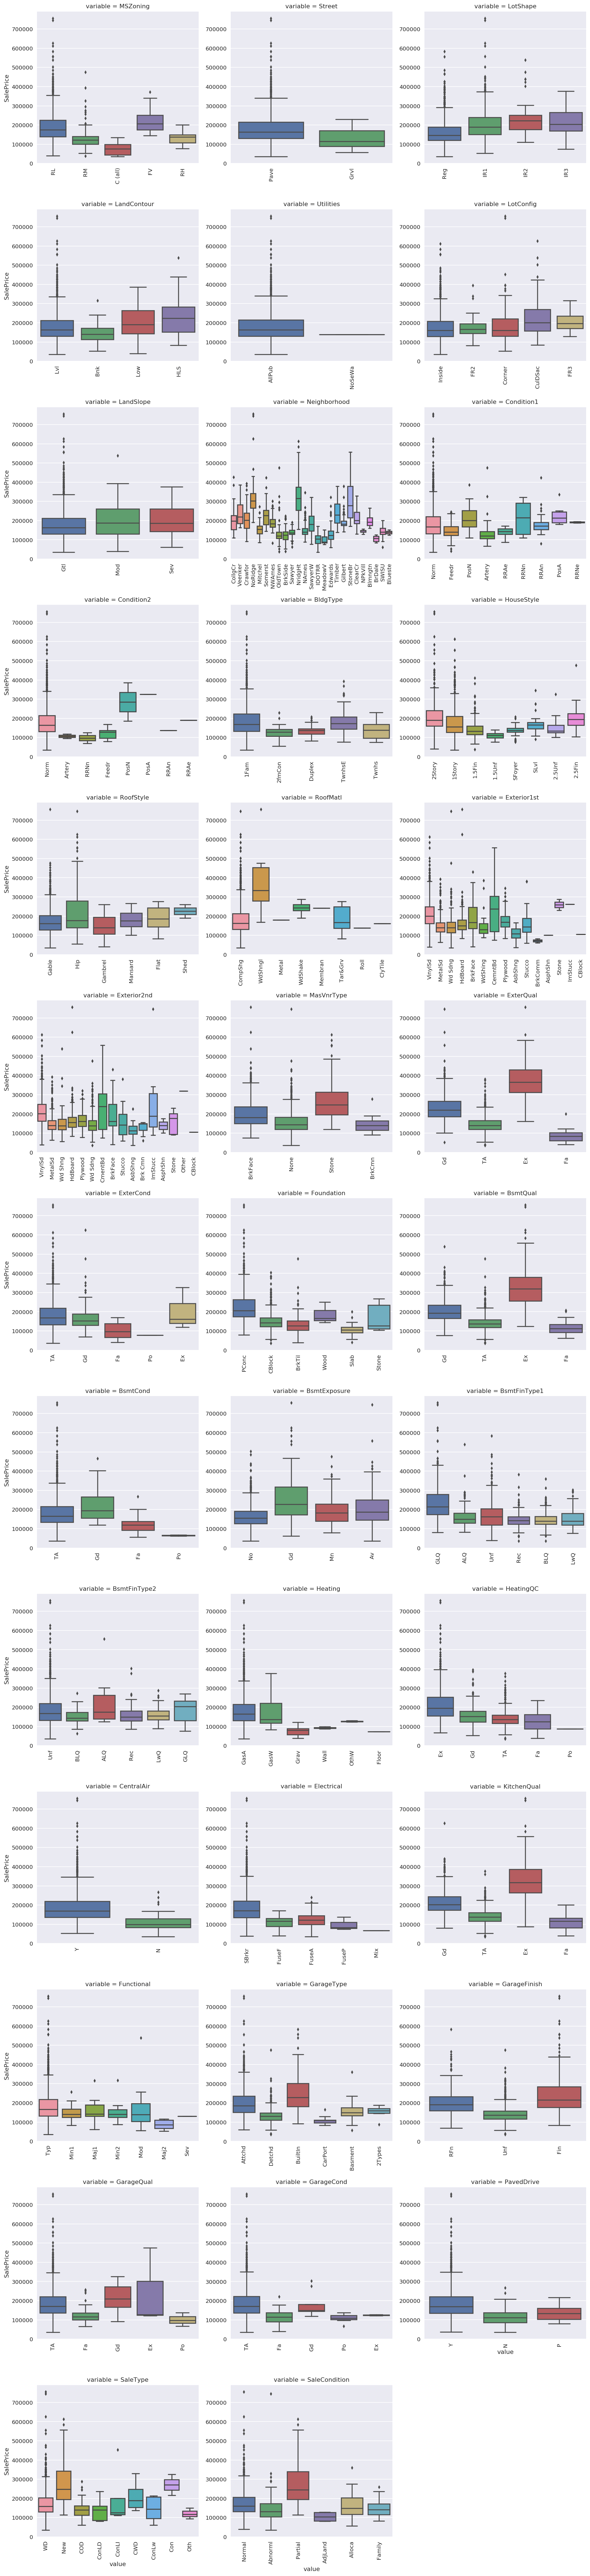

In [29]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x = plt.xticks(rotation=90)


f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=category_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=3,
                  sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

根据不同特征的取值对于 SalePrice 的区分度，筛选了如下特征。

In [30]:
selected_cate_features= ['MSZoning','Neighborhood','Condition2','HouseStyle','RoofMatl','ExterQual','ExterCond','BsmtQual','CentralAir','KitchenQual','GarageType','GarageFinish','SaleType', 'SaleCondition']
selected_cate_features

['MSZoning',
 'Neighborhood',
 'Condition2',
 'HouseStyle',
 'RoofMatl',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'CentralAir',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'SaleType',
 'SaleCondition']

In [31]:
selected_features = selected_numeric_features + selected_cate_features

In [32]:
df_train_selected = df_train[selected_features]

In [33]:
df_train_selected.isnull().sum()

OverallQual       0
GrLivArea         0
GarageCars        0
TotalBsmtSF       0
FullBath          0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
Fireplaces        0
MSZoning          0
Neighborhood      0
Condition2        0
HouseStyle        0
RoofMatl          0
ExterQual         0
ExterCond         0
BsmtQual         37
CentralAir        0
KitchenQual       0
GarageType       81
GarageFinish     81
SaleType          0
SaleCondition     0
dtype: int64

In [34]:
mean_val = df_train_selected['MasVnrArea'].mean()
mean_val

103.68526170798899

In [35]:
df_train_selected.isnull().sum()

OverallQual       0
GrLivArea         0
GarageCars        0
TotalBsmtSF       0
FullBath          0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
Fireplaces        0
MSZoning          0
Neighborhood      0
Condition2        0
HouseStyle        0
RoofMatl          0
ExterQual         0
ExterCond         0
BsmtQual         37
CentralAir        0
KitchenQual       0
GarageType       81
GarageFinish     81
SaleType          0
SaleCondition     0
dtype: int64

In [36]:
# 合并训练数据集和测试数据集，一起做缺失值处理
all_data = pd.concat([df_train[selected_features], df_test[selected_features]])
all_data.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,MSZoning,Neighborhood,Condition2,HouseStyle,RoofMatl,ExterQual,ExterCond,BsmtQual,CentralAir,KitchenQual,GarageType,GarageFinish,SaleType,SaleCondition
0,7,1710,2.0,856.0,2,2003,2003,196.0,0,RL,CollgCr,Norm,2Story,CompShg,Gd,TA,Gd,Y,Gd,Attchd,RFn,WD,Normal
1,6,1262,2.0,1262.0,2,1976,1976,0.0,1,RL,Veenker,Norm,1Story,CompShg,TA,TA,Gd,Y,TA,Attchd,RFn,WD,Normal
2,7,1786,2.0,920.0,2,2001,2002,162.0,1,RL,CollgCr,Norm,2Story,CompShg,Gd,TA,Gd,Y,Gd,Attchd,RFn,WD,Normal
3,7,1717,3.0,756.0,1,1915,1970,0.0,1,RL,Crawfor,Norm,2Story,CompShg,TA,TA,TA,Y,Gd,Detchd,Unf,WD,Abnorml
4,8,2198,3.0,1145.0,2,2000,2000,350.0,1,RL,NoRidge,Norm,2Story,CompShg,Gd,TA,Gd,Y,Gd,Attchd,RFn,WD,Normal


In [37]:
all_data.isnull().sum()

OverallQual        0
GrLivArea          0
GarageCars         1
TotalBsmtSF        1
FullBath           0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
Fireplaces         0
MSZoning           4
Neighborhood       0
Condition2         0
HouseStyle         0
RoofMatl           0
ExterQual          0
ExterCond          0
BsmtQual          81
CentralAir         0
KitchenQual        1
GarageType       157
GarageFinish     159
SaleType           1
SaleCondition      0
dtype: int64

缺失值处理，基本的思路是：
+ 类别型特征：使用众数填充
+ 数值型特征：使用平均数填充

In [38]:
all_data['GarageCars'].fillna(all_data['GarageCars'].mode().values[0], inplace=True)
all_data['TotalBsmtSF'].fillna(all_data['TotalBsmtSF'].mean(), inplace=True)

# 有好多 0，可能用平均值填充不靠谱
all_data['MasVnrArea'].fillna(all_data['MasVnrArea'].mean(), inplace=True)

all_data['BsmtQual'].fillna(all_data['BsmtQual'].mode().values[0], inplace=True)
all_data['MSZoning'].fillna(all_data['MSZoning'].mode().values[0], inplace=True)
all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode().values[0], inplace=True)

all_data['GarageType'].fillna(all_data['GarageType'].mode().values[0], inplace=True)
all_data['GarageFinish'].fillna(all_data['GarageFinish'].mode().values[0], inplace=True)
all_data['SaleType'].fillna(all_data['SaleType'].mode().values[0], inplace=True)

In [39]:
all_data = pd.get_dummies(all_data)
y_train = df_train['SalePrice'].values

In [40]:
X_train = all_data[:df_train.shape[0]]

X_test = all_data[df_train.shape[0]:]

In [41]:
df_train.shape, df_test.shape

((1460, 68), (1459, 80))

In [42]:
X_train.shape, X_test.shape

((1460, 106), (1459, 106))

## 模型预测

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

linear_re = LinearRegression()

In [44]:
# 输入线性回归的数据要在一个数量尺度上，这样梯度下降法收敛快
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train.values)

In [45]:
linear_re.fit(X_train_scaler, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
# 测试数据集使用和训练数据一样的平均值和方差进行标准化
X_test_scaler = scaler.transform(X_test.values)

y_pred = linear_re.predict(X_test_scaler)

In [47]:
out = pd.DataFrame({'Id':df_test['Id'],'SalePrice':y_pred})
out

,Id,SalePrice
0,1461,102146.2006
1,1462,153261.9506
2,1463,174736.0756
3,1464,186511.3256
4,1465,225394.7006
5,1466,178641.3256
6,1467,169416.8256
7,1468,170044.3256
8,1469,188558.9506
9,1470,115387.2006


In [48]:
out.to_csv('house_prices_20180922.csv', index=None)

## 总结

+ 特征工程基本不知道怎么做：这里连续型变量就看线性相关系数，离散型变量有点猜的意思。
+ 知道随机森林、LASSO 回归可以做特征选择，但是这里还不知道如何应用。
+ 只用了简单的线性回归，应该尝试使用模型融合：随机森林、梯度提升、XGBoost 试试。
+ 模型的参数也没有选择，应该用网格搜索找到模型的最优超参数。

不懂的东西还有很多，接下来潜心钻研。